In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#api_key

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

618

In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
units="metric"

# Build partial query URL
query_url = f"{url}&units={units}&q="
#query_url
response = requests.get(query_url + city).json()
#response['coord']['lat']

In [4]:
clean_cities=[]
lat=[]
lng=[]
temp=[]
humidity=[]
cloudiness=[]
wind_speed= []
date=[]

# Loop through the list of cities and perform a request for data on each

for city in cities:
    #print(city)
    try:
        response = requests.get(query_url + city).json()
        clean_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        time.sleep(3)
    except:
        #print("Skipped a city")
        pass 
    


In [5]:
#clean_cities
#pprint(response)

In [6]:
#display the city data frame
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": clean_cities,
    "latitude": lat,
    "longitude": lng,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind speed": wind_speed,
    "date": date
}

cities_data = pd.DataFrame(weather_dict)
cities_data.head()

,city,latitude,longitude,temp,humidity,cloudiness,wind speed,date
0,Lebu,8.96,38.73,60.80,51,0,6.93,1538334000
1,Nishihara,35.74,139.53,78.80,68,1,5.82,1538337360
2,Mizdah,31.45,12.98,62.63,57,0,8.88,1538337989
3,Hambantota,6.12,81.12,78.20,100,68,7.20,1538337992
4,Kashira,54.84,38.15,44.60,65,0,8.95,1538335800


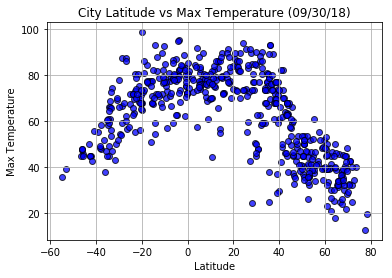

In [7]:
# #do something to create a scatter plot of lat(x) and max temp(y)
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.show()

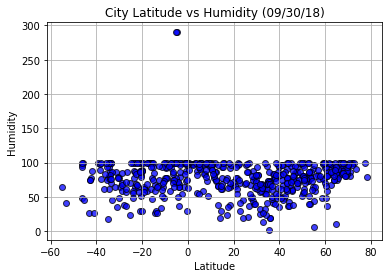

In [8]:
# #do something to create a scatter plot of lat(x) and humidity(y)
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

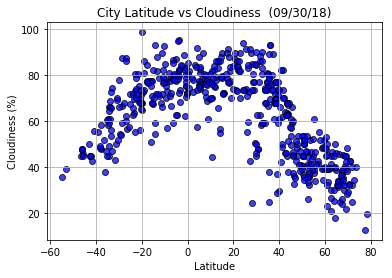

In [9]:
# #do something to create a scatter plot of lat(x) and cloudiness(y)
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Cloudiness  (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

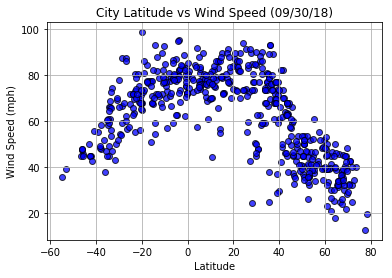

In [10]:
# #do something to create a scatter plot of lat(x) and wind speed(y)
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()